In [57]:
from pandas import *
from matplotlib.pyplot import *
from seaborn import *
from sklearn.metrics import f1_score,accuracy_score,precision_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import CategoricalNB


In [58]:
data = read_csv(r"C:\Users\FAISAL-PC\Downloads\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
data.drop(columns=['PassengerId'],inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [61]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [63]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

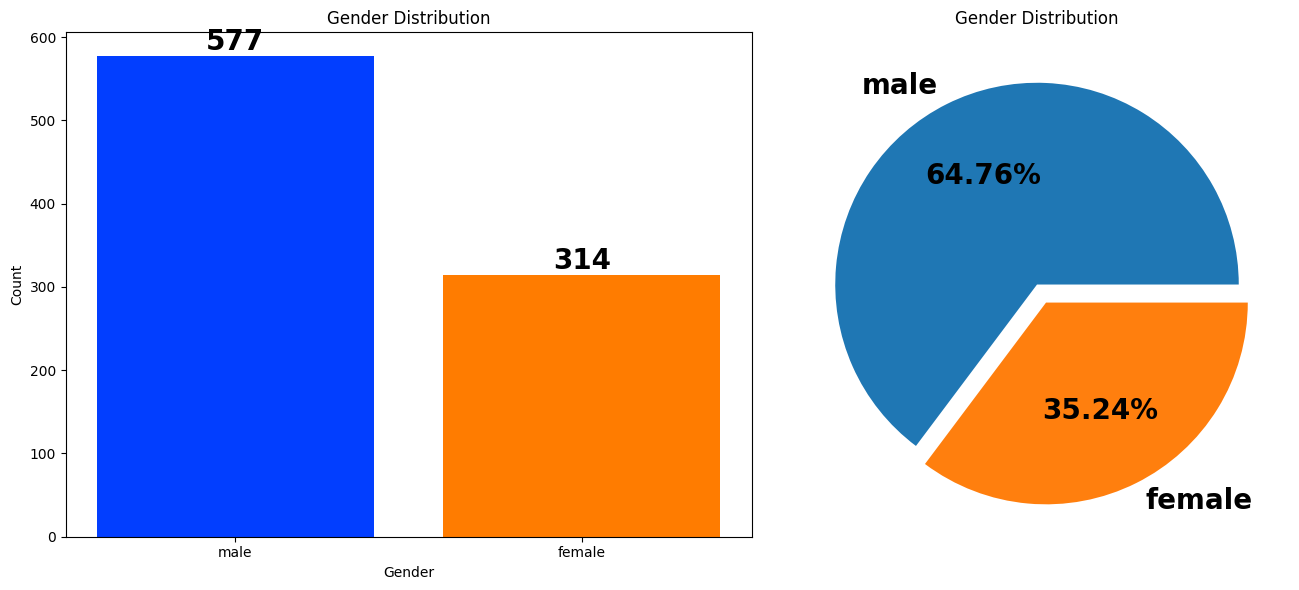

In [64]:
figure(figsize=(14,6))
subplot(1,2,1)
count = data['Sex'].value_counts()
bars = bar(count.index,count.values,color=color_palette('bright'))
bar_label(bars,fontsize=20,fontweight='bold')
title('Gender Distribution')
xlabel("Gender")
ylabel('Count')
tight_layout()

subplot(1,2,2)
pie(count,labels=count.index,autopct='%1.2f%%',startangle=0,explode=tuple([0]+[0.1]*(len(count)-1)),textprops={'fontweight':'bold','fontsize':20})
title('Gender Distribution')
tight_layout()
show()

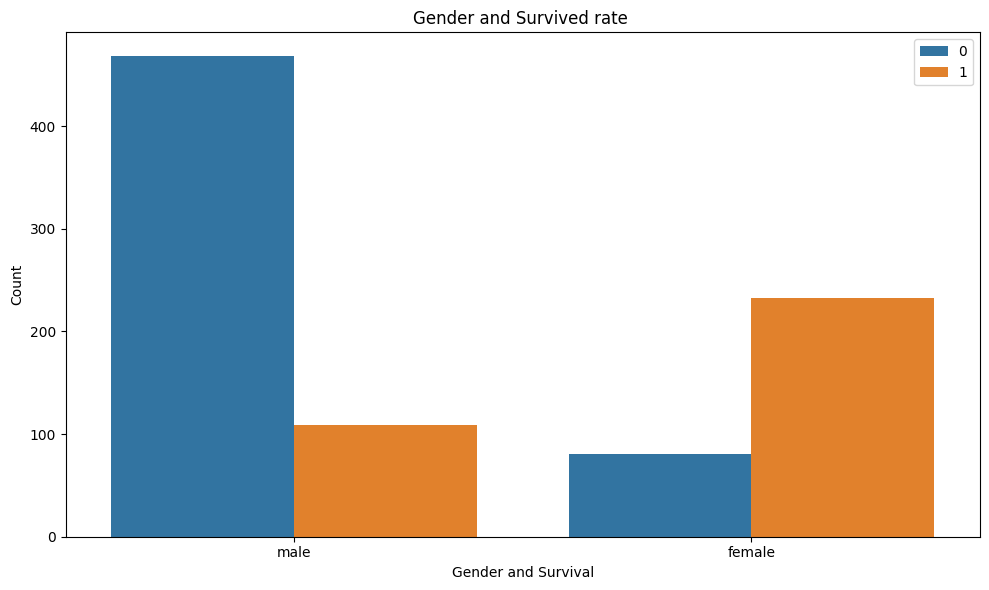

In [65]:
figure(figsize=(10,6))
countplot(x='Sex',hue='Survived',data=data)
title('Gender and Survived rate ')
xlabel("Gender and Survival")
ylabel('Count')
legend()
tight_layout()
show()

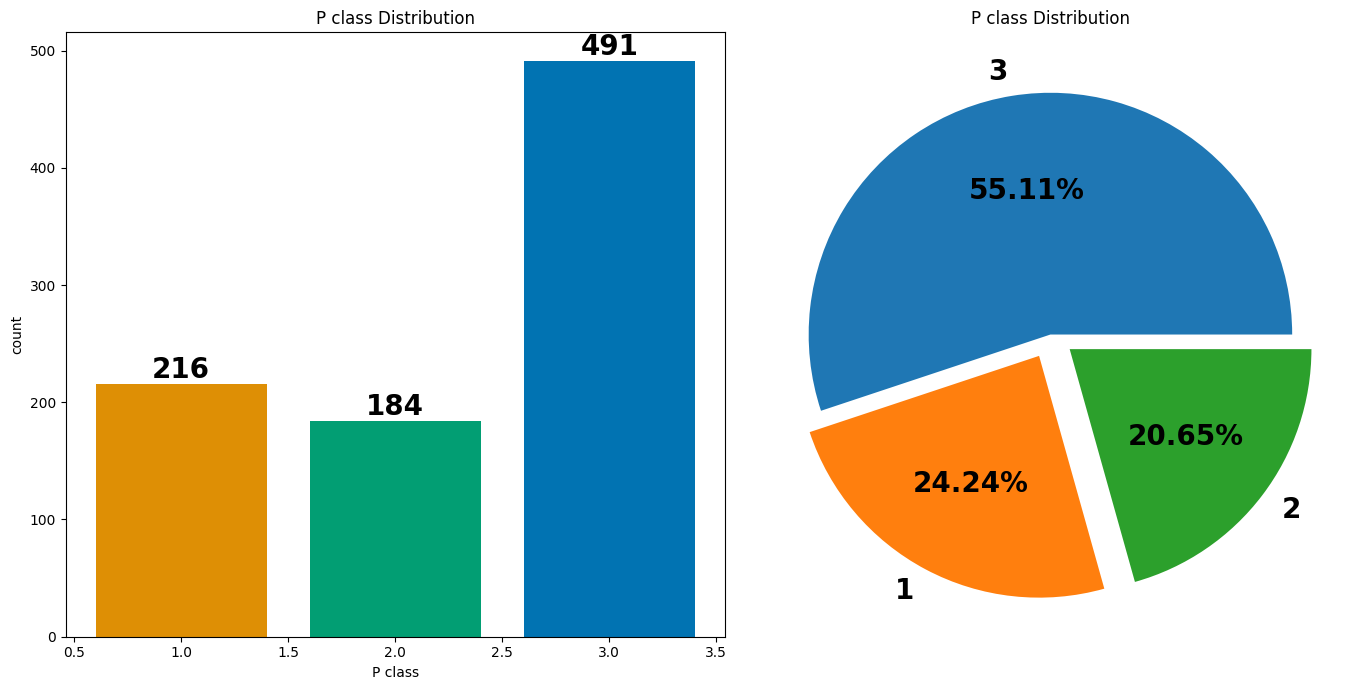

In [66]:
figure(figsize=(14,7))
subplot(1,2,1)
count = data['Pclass'].value_counts()
bars = bar(count.index,count.values,color=color_palette('colorblind'))
bar_label(bars,fontweight='bold',fontsize=20)
title('P class Distribution')
xlabel('P class')
ylabel('count')
tight_layout()

subplot(1,2,2)
pie(count,labels=count.index,autopct='%1.2f%%',startangle=0,explode=tuple([0]+[0.1]*(len(count)-1)),textprops={'fontweight':'bold','fontsize':20})
title('P class Distribution')
tight_layout()
show()

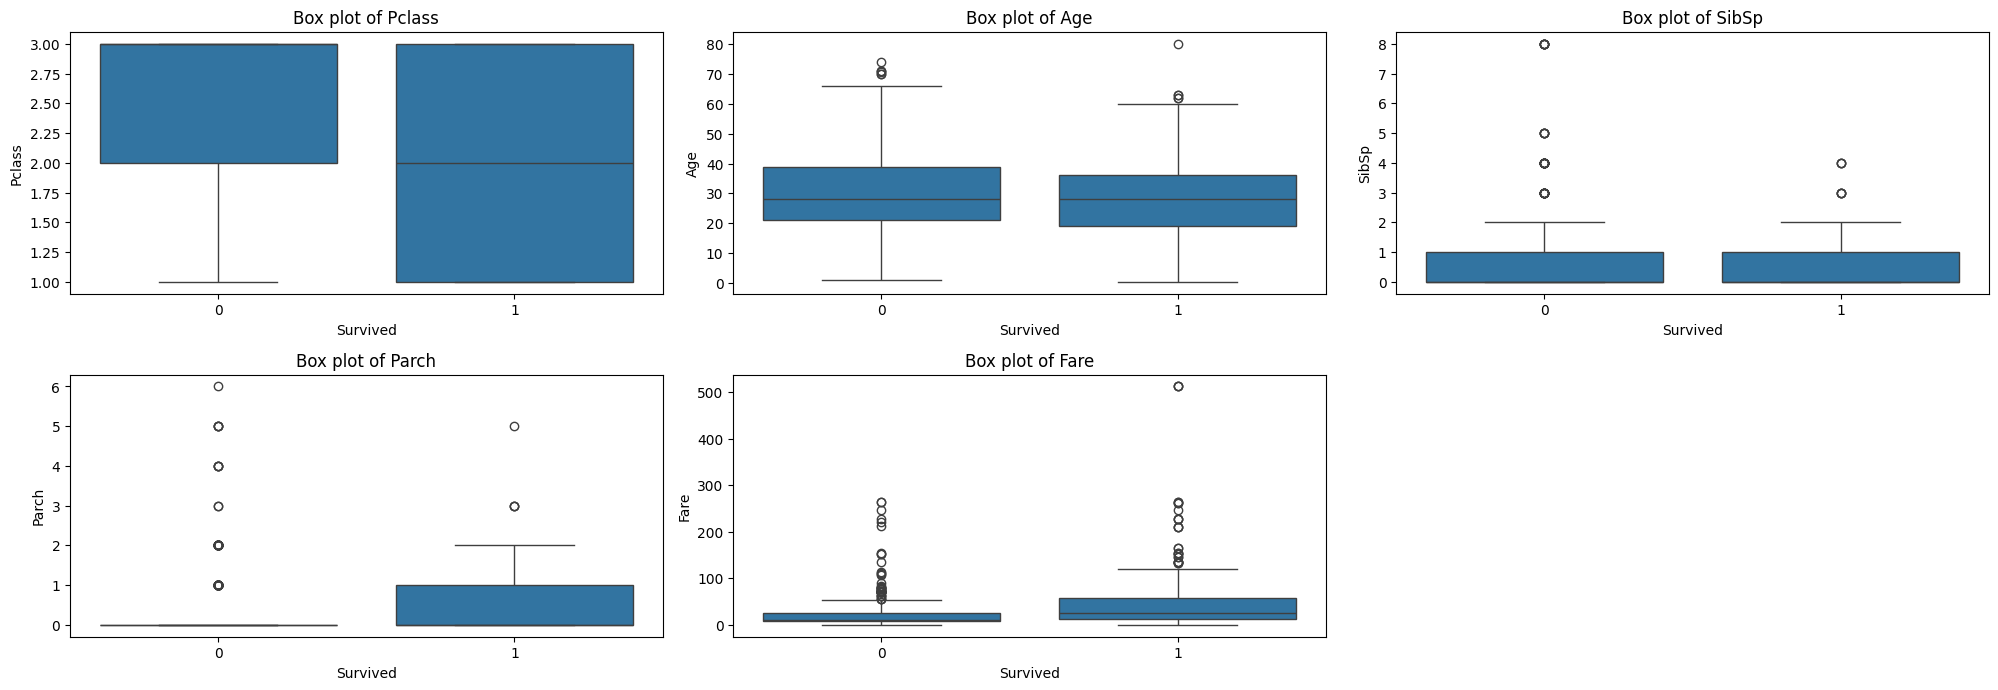

In [67]:
cols = data.select_dtypes(include=['int64','float64']).columns
cols = cols.drop('Survived')
figure(figsize=(20,10))
for i , col in enumerate(cols,1):
    subplot(3,3,i)
    boxplot(x='Survived',y=col,data=data)
    title(f"Box plot of {col}")
tight_layout()
show()

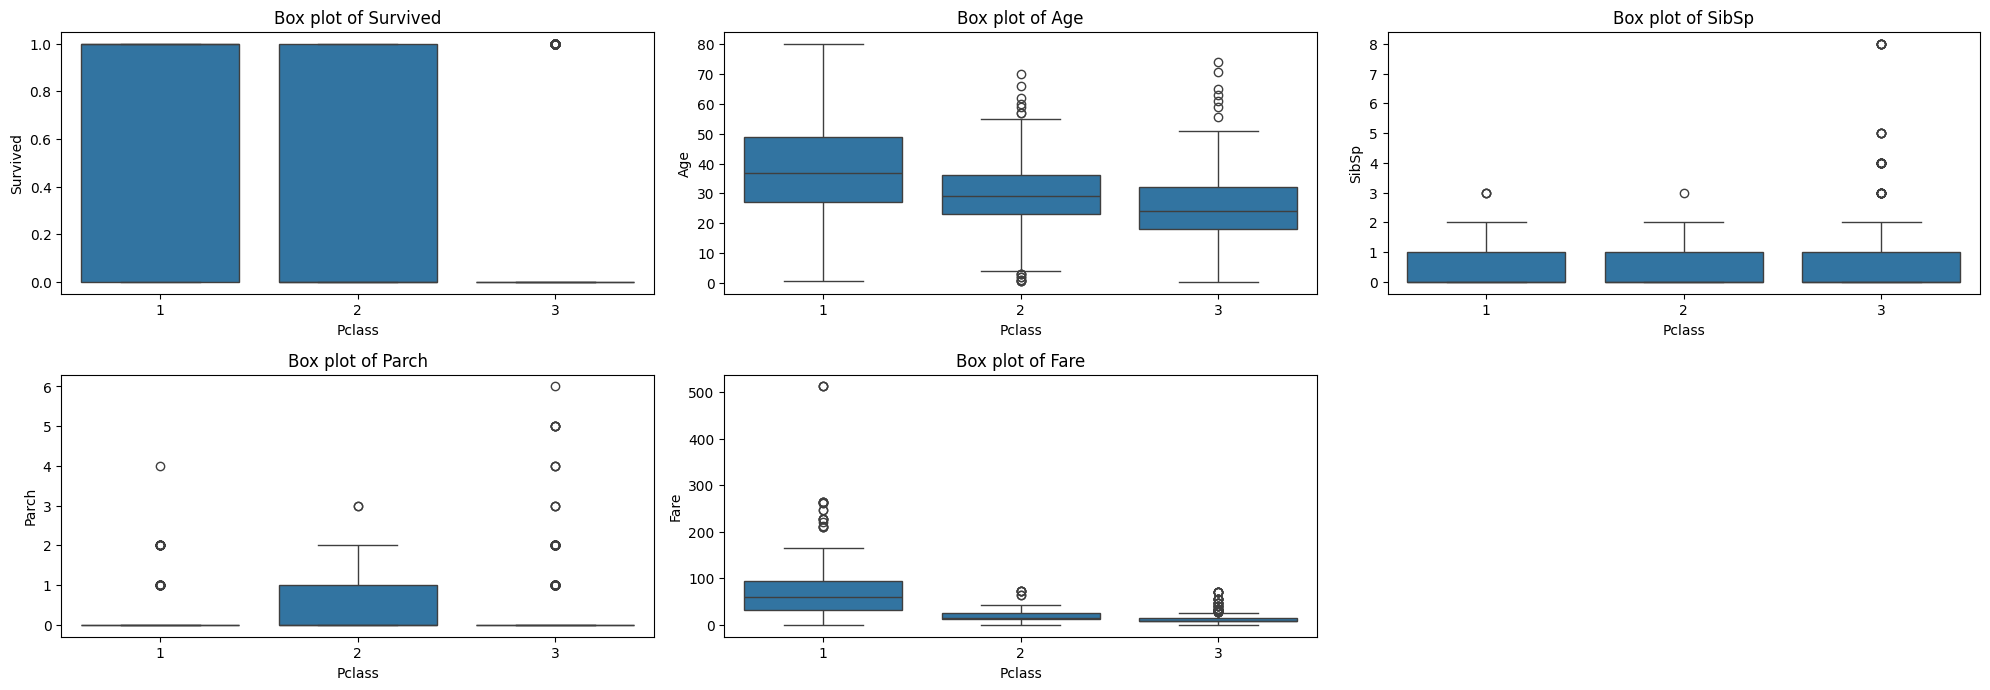

In [68]:
cols = data.select_dtypes(include=['int64','float64']).columns
cols = cols.drop('Pclass')
figure(figsize=(20,10))
for i,col in enumerate(cols,1):
    subplot(3,3,i)
    boxplot(x='Pclass',y=col,data=data)
    title(f'Box plot of {col}')
tight_layout()
show()

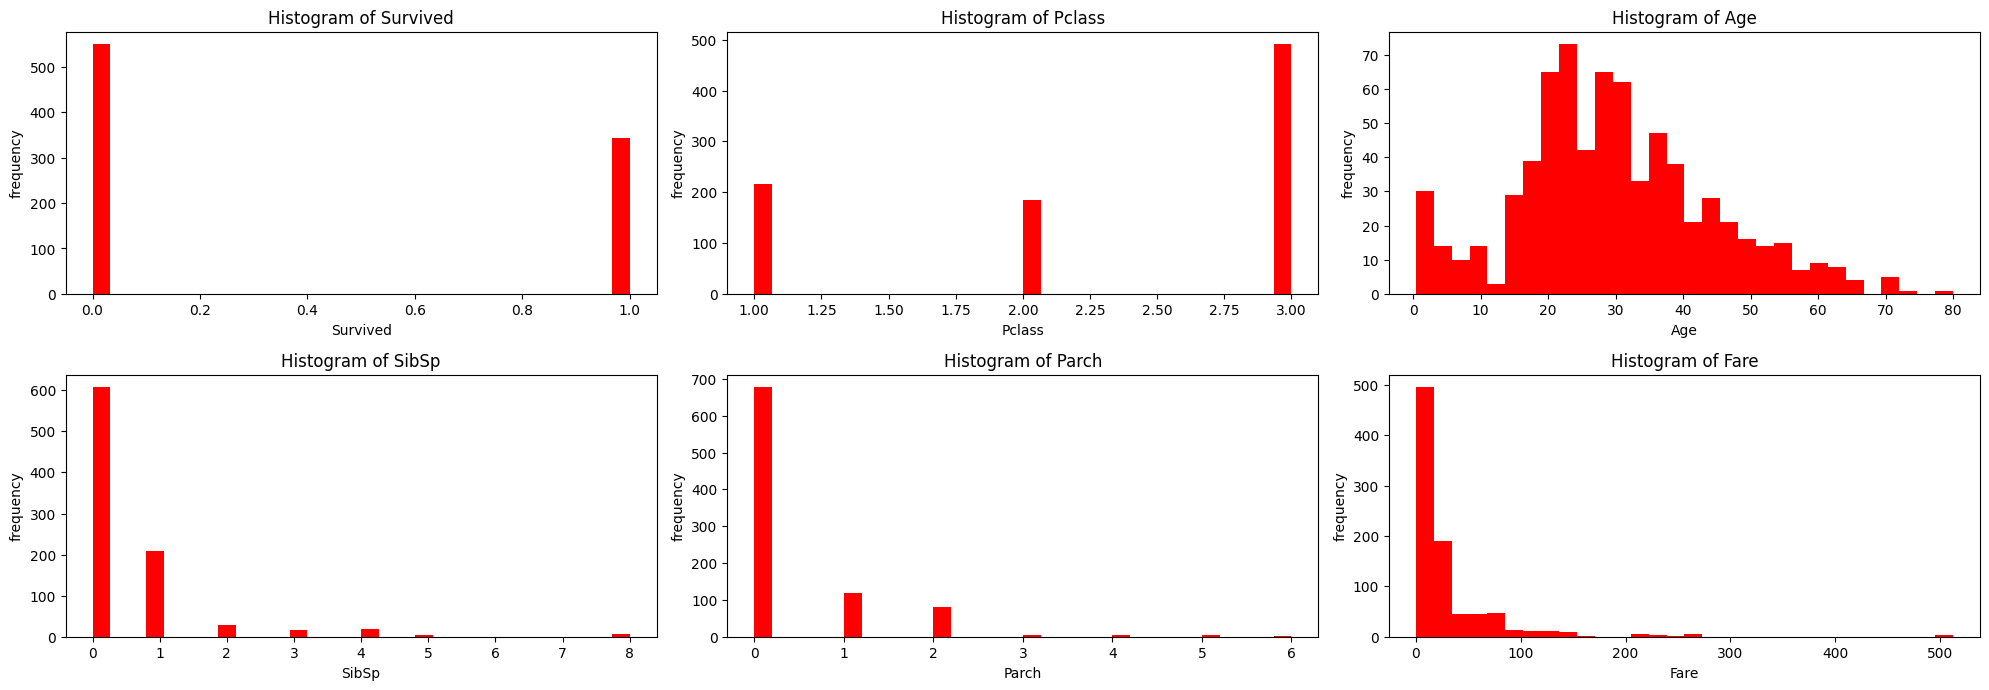

In [69]:
cols = data.select_dtypes(include=['int64','float64']).columns
figure(figsize=(20,10))
for i,col in enumerate(cols,1):
    subplot(3,3,i)
    hist(data[col].dropna(),bins=30,color='red')
    title(f'Histogram of {col}')
    xlabel(col)
    ylabel('frequency')
tight_layout()
show()

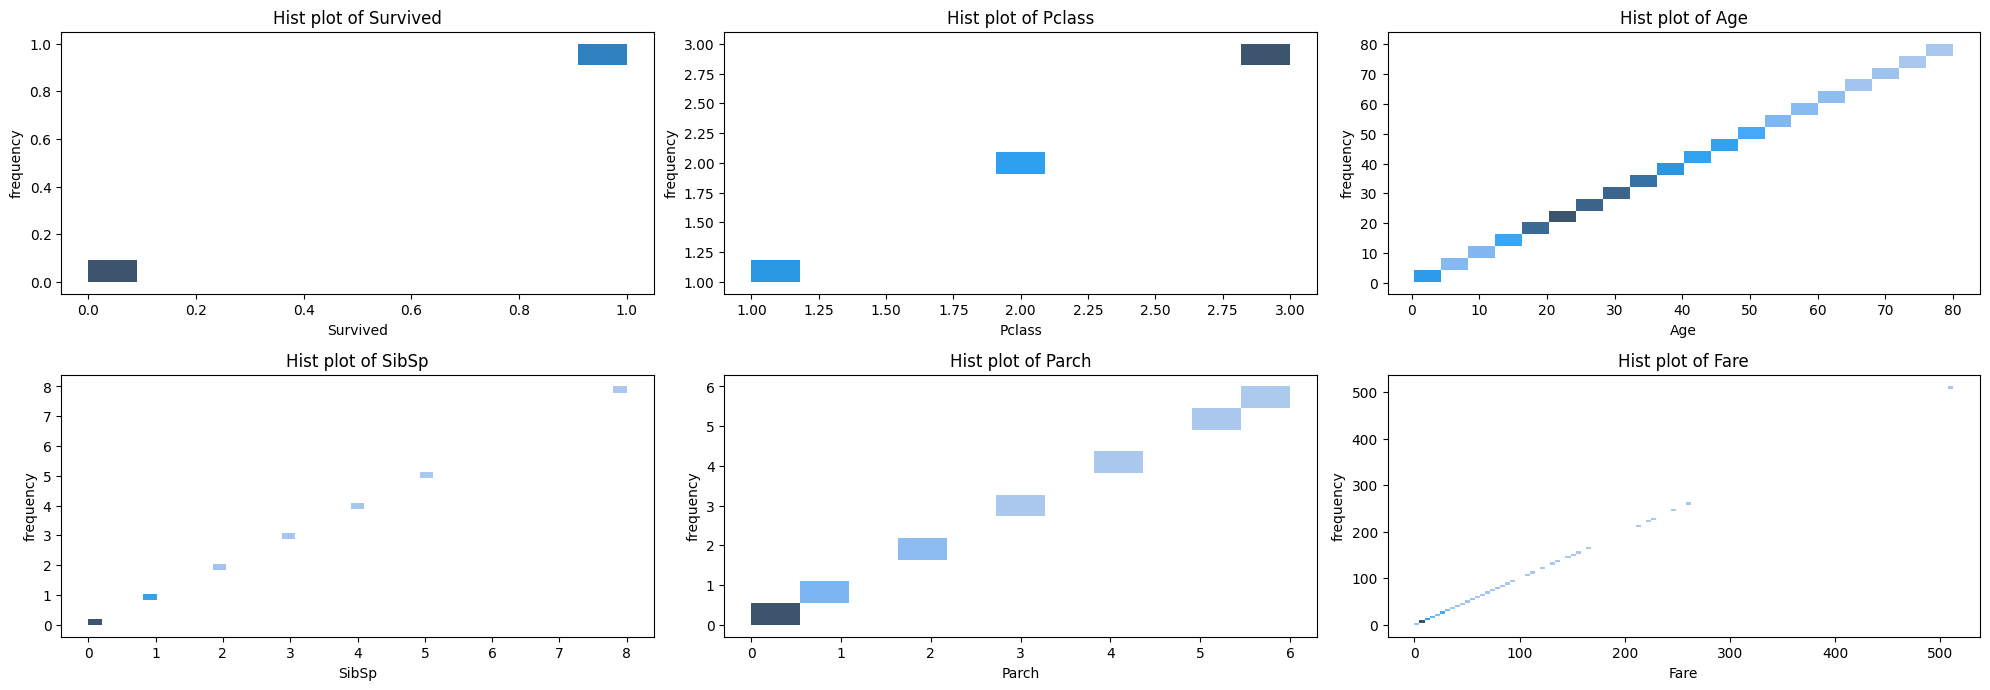

In [50]:
cols = data.select_dtypes(include=['int64','float64']).columns
figure(figsize=(20,10))
for i,col in enumerate(cols,1):
    subplot(3,3,i)
    histplot(x=data[col].dropna(),y=col,data=data)
    title(f'Hist plot of {col}')
    xlabel(col)
    ylabel('frequency')
tight_layout()
show()

In [71]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
def remove_outliers_iqr(data, cols):
    df_new = data.copy()
    for col in cols:
        Q1 = df_new[col].quantile(0.25)
        Q3 = df_new[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        
        df_new = df_new[(df_new[col] >= lower) & (df_new[col] <= upper)]
    return df_new


num_cols = ["Age", "Fare", "SibSp", "Parch"]

df_no_outliers = remove_outliers_iqr(data, num_cols)

print( data.shape)
print( df_no_outliers.shape)

(891, 11)
(453, 11)


In [75]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

C:\Users\FAISAL-PC\AppData\Local\Temp\ipykernel_22656\4208409444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(),inplace=True)


In [79]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

In [81]:
data.drop(columns=['Name','Cabin','Ticket'],inplace=True)


In [82]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


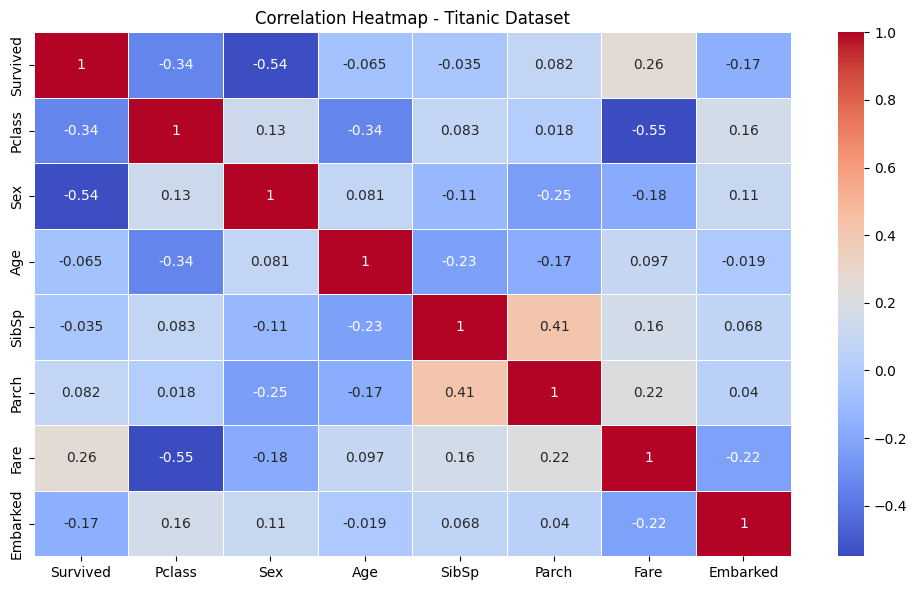

In [83]:
figure(figsize=(10,6))
heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
title("Correlation Heatmap - Titanic Dataset")
tight_layout()
show()

In [84]:
X = data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = data['Survived']
X = StandardScaler().fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.3,stratify=y)

In [119]:
model1 = RandomForestClassifier(criterion='log_loss',n_estimators=500, random_state=42, max_depth=15, min_samples_split=2, min_samples_leaf=1, max_features="sqrt")
model1.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=15, n_estimators=500,
                       random_state=42)

In [120]:
y_pred = model1.predict(X_test)
print(model1.score(X_train,y_train))
print(f'Accuracy Score:{accuracy_score(y_test,y_pred)}')
print(f'Precision Score:{precision_score(y_test,y_pred)}')
print(f'F1 score:{f1_score(y_test,y_pred)}')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9743178170144462
Accuracy Score:0.8134328358208955
Precision Score:0.8045977011494253
F1 score:0.7368421052631579
[[148  17]
 [ 33  70]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       165
           1       0.80      0.68      0.74       103

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [121]:
from sklearn.svm import *
model2 = SVC(C=3,kernel='rbf',probability=True)
model2.fit(X_train,y_train)

SVC(C=3, probability=True)

In [122]:
y_pred = model2.predict(X_test)
print(model2.score(X_train,y_train))
print(f'Accuracy Score:{accuracy_score(y_test,y_pred)}')
print(f'Precision Score:{precision_score(y_test,y_pred)}')
print(f'F1 score:{f1_score(y_test,y_pred)}')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.85553772070626
Accuracy Score:0.8097014925373134
Precision Score:0.7888888888888889
F1 score:0.7357512953367875
[[146  19]
 [ 32  71]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.79      0.69      0.74       103

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



In [133]:
model3 = XGBClassifier(use_label_encoder=True, eval_metric="logloss", random_state=42)
model3.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [134]:
y_pred = model3.predict(X_test)
print(model2.score(X_train,y_train))
print(f'Accuracy Score:{accuracy_score(y_test,y_pred)}')
print(f'Precision Score:{precision_score(y_test,y_pred)}')
print(f'F1 score:{f1_score(y_test,y_pred)}')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.85553772070626
Accuracy Score:0.7835820895522388
Precision Score:0.7419354838709677
F1 score:0.7040816326530612
[[141  24]
 [ 34  69]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       165
           1       0.74      0.67      0.70       103

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

